In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
tqdm.pandas()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

pd.set_option("display.max_columns", None)

In [2]:
df1 = pd.read_excel("Survey Data.xlsx", sheet_name = "Risikoatlas_EuropeanSurvey_tran")

In [3]:
df2 = df1.loc[ :, ["English_risk1", "English_risk2", "English_risk3"]].copy()

df2[["English_risk1", "English_risk2", "English_risk3"]] = df2[["English_risk1", "English_risk2", "English_risk3"]].astype(str)
df2

,English_risk1,English_risk2,English_risk3
0,money,job,family
1,fire,drowning,det
2,job loss,no money,being fleeced in divorce
3,money,safe,security
4,no money,not sure,not sure
...,...,...,...
647,car accident,family being ill,car breaking down
648,workplace,society,health
649,surgery,age,illness
650,money,moving,job


In [4]:
wordList1 = [word for x in df2["English_risk1"] for word in x.split()]
wordList2 = [word for x in df2["English_risk2"] for word in x.split()]
wordList3 = [word for x in df2["English_risk3"] for word in x.split()]

wordList = wordList1 + wordList2 + wordList3

In [5]:
df3 = pd.DataFrame()
df3["wordList"] = wordList
df3["wordList"].value_counts()

wordList
health        323
money         140
job            91
of             80
none           71
             ... 
burgled         1
dependance      1
again           1
father          1
breaking        1
Name: count, Length: 764, dtype: int64

In [6]:
# sns.displot( data = df3["wordList"], y = df3["wordList"], kind = "hist")

In [7]:
stopwords = STOPWORDS

In [8]:
wc = WordCloud( background_color = "white", stopwords = stopwords).generate(' '.join(df3["wordList"]))

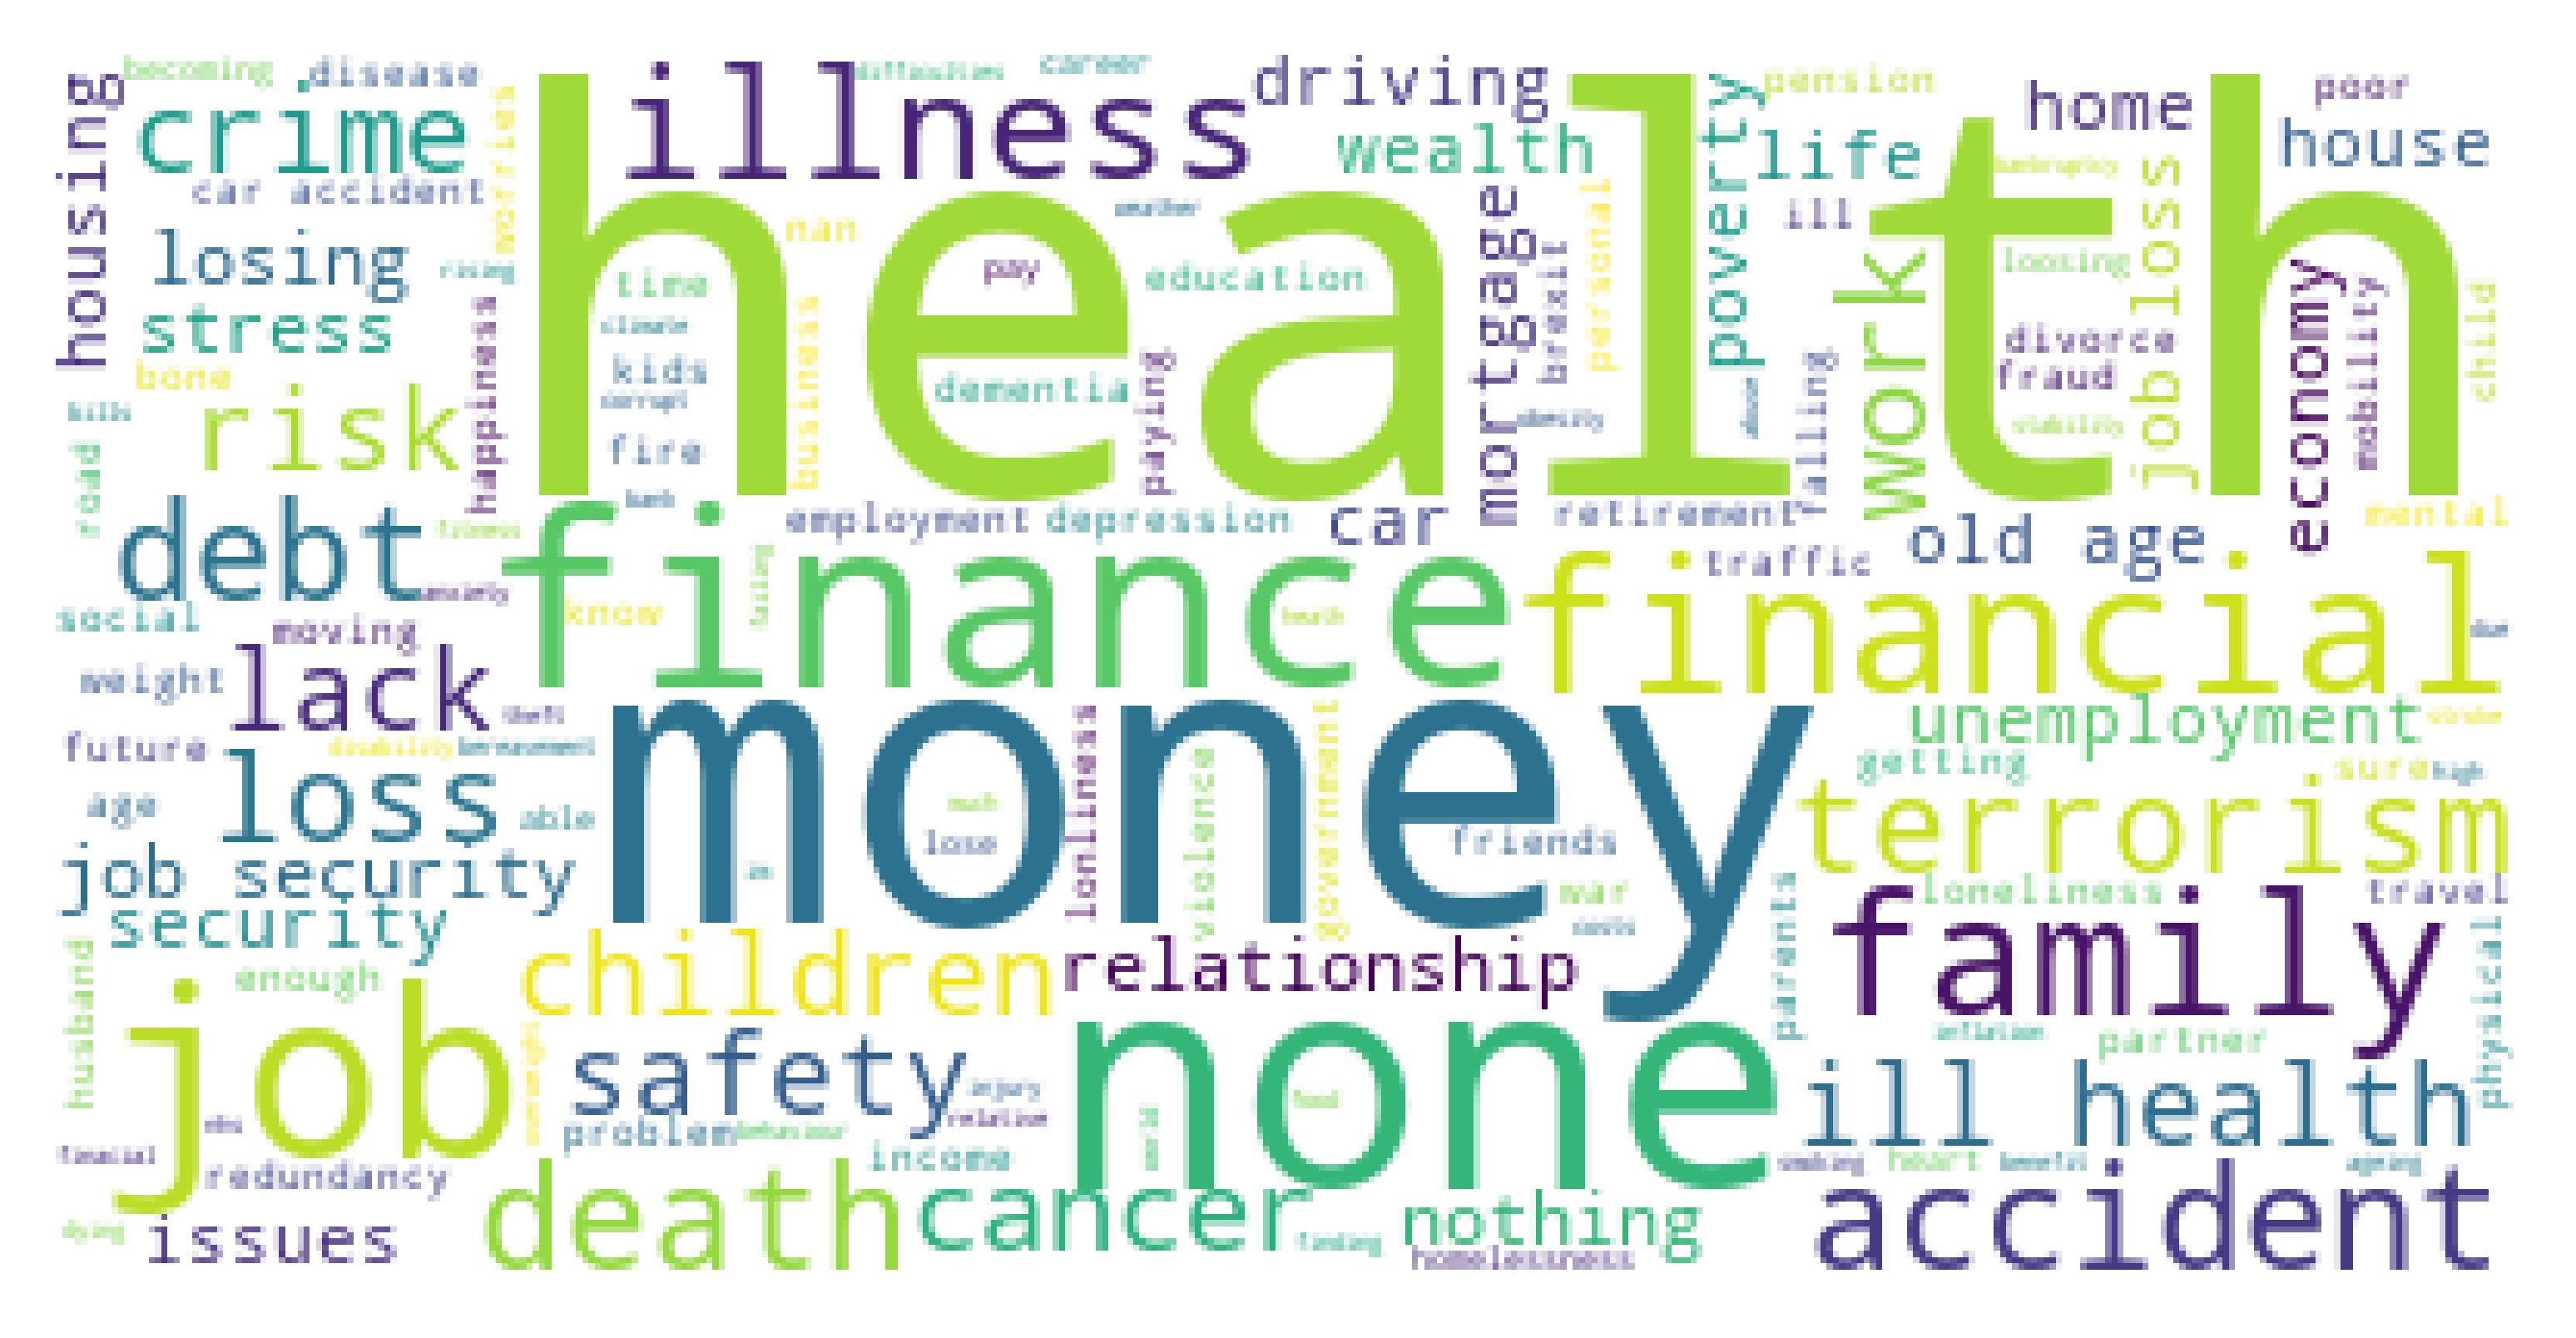

In [9]:
stopwords.add('lack')
stopwords.add('ill')
stopwords.add('nothing')


plt.imshow(wc)
plt.axis("off")
plt.savefig("UKrisks_wordCloud.png")
plt.show()
